In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [4]:
df = pd.read_csv("europe-motorbikes-zenrows.csv")

In [5]:
df.head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.0,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.0,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.0,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.0,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [7]:
df.shape

(34917, 10)

In [8]:
pd.set_option("display.float_format","{:.2f}".format)

In [9]:
df.describe()

,price,mileage,power
count,34917.00,34917.00,28598.00
mean,45685.32,21831.75,206.16
std,4850120.19,205942.09,9371.43
min,1.00,0.00,1.00
25%,6999.00,2932.00,50.00
50%,9920.00,11000.00,90.00
75%,12590.00,25000.00,125.00
max,888888888.00,9999999.00,913595.00


In [10]:
df.isnull().sum()

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

In [11]:
df.duplicated().sum()

5832

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

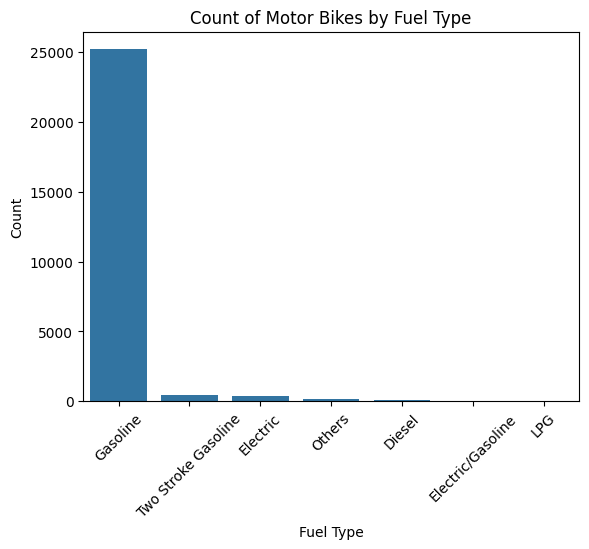

In [14]:
sns.countplot(x="fuel", data = df)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count of Motor Bikes by Fuel Type")
plt.xticks(rotation =45)
plt.show()


In [15]:
df['fuel'] =df['fuel'].fillna('Gasoline')
df['power']=df['power'].replace(np.nan,0)

In [16]:
df.isna().sum()

price             0
mileage           0
power             0
make_model        0
date              0
fuel              0
gear          18294
offer_type        0
version       14402
link              0
dtype: int64

<AxesSubplot: xlabel='gear', ylabel='count'>

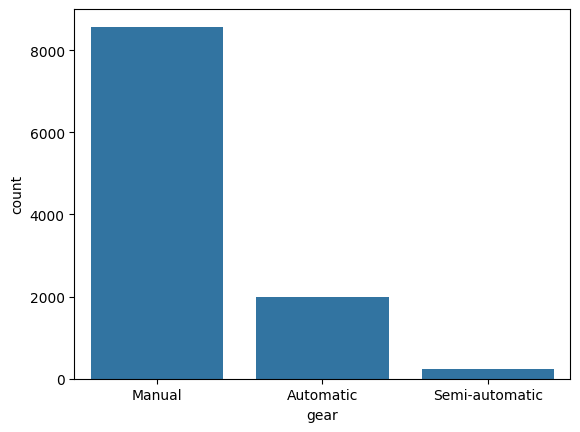

In [17]:
sns.countplot(x='gear',data=df)

In [18]:
df['gear']=df['gear'].fillna('Manual')
df.isna().sum()

price             0
mileage           0
power             0
make_model        0
date              0
fuel              0
gear              0
offer_type        0
version       14402
link              0
dtype: int64

In [19]:
df['version']=df['version'].replace(np.nan,'None')
df['version']

0        CBR1000RR-R Fireblade SP
1                            None
2                            None
3                              RF
4                            None
                   ...           
34911                        None
34912                 R 1200RT LC
34913                        None
34915          Black mit Garantie
34916                        None
Name: version, Length: 29085, dtype: object

In [20]:
gear_power= df.groupby("gear")["power"].mean()
gear_power

gear
Automatic         75.86
Manual           119.82
Semi-automatic   126.39
Name: power, dtype: float64

In [22]:
df

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
23654,888888888,1196,10.00,SYM SYMNH X,08/2019,Gasoline,Manual,Used,!!! VENDUE !!! indisponible,/offers/sym-symnh-x-vendue-indisponible-gasoli...
20925,123456789,24000,101.00,Buell XB 12,06/2009,Gasoline,Manual,Used,None,/offers/buell-xb-12-gasoline-red-6bd3eec5-449d...
6857,123456789,24,175.00,EBR RS,11/2011,Gasoline,Manual,Used,EBR 1190 RS Nieuw !,/offers/ebr-rs-ebr-1190-rs-nieuw-gasoline-blac...
28952,9999999,9999999,12.00,Harley-Davidson Custom Bike,02/2018,Gasoline,Manual,Used,None,/offers/harley-davidson-custom-bike-gasoline-g...
27266,9999999,9999999,1358.00,Harley-Davidson Bad Boy,01/2020,Diesel,Manual,Used,test big images,/offers/harley-davidson-bad-boy-test-big-image...
...,...,...,...,...,...,...,...,...,...,...
34899,50,390,1.00,Kymco Like 50,06/2011,Gasoline,Manual,Used,None,/offers/kymco-like-50-gasoline-white-70b79c85-...
11155,50,19000,88.00,Harley-Davidson Dyna Wide Glide,03/1999,Gasoline,Manual,Used,None,/offers/harley-davidson-dyna-wide-glide-gasoli...
19299,50,6700,4.00,Suzuki Katana 50,03/1997,Gasoline,Manual,Used,None,/offers/suzuki-katana-50-gasoline-black-0e0927...
15003,2,23000,14.00,Dnepr MT 10,09/1984,Gasoline,Manual,Antique / Classic,36 Sidecar,/offers/dnepr-mt-10-36-sidecar-gasoline-black-...


In [23]:
def remove_outliers_iqr(df, column):
    # Calculate first quartile (Q1) and third quartile (Q3)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Remove outliers from the DataFrame
    cleaned_df = df[~outliers]

    return cleaned_df

In [24]:
df = remove_outliers_iqr(df, 'price')
df

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
17780,23700,21226,118.00,Honda NRX 1800,08/2005,Gasoline,Manual,Used,Rune Valkyrie,/offers/honda-nrx-1800-rune-valkyrie-gasoline-...
15047,23700,50500,90.00,Harley-Davidson Street Glide,07/2017,Gasoline,Manual,Used,SPECIAL,/offers/harley-davidson-street-glide-special-g...
8639,23700,410,87.00,Harley-Davidson Softail Slim,03/2020,Gasoline,Manual,Used,Harley Davidson FLSL Leder KessTech Auspuffanlage,/offers/harley-davidson-softail-slim-harley-da...
17945,23690,0,0.00,Ducati XDiavel,01/2021,Gasoline,Manual,New,None,/offers/ducati-xdiavel-black-2a6e33fa-7a55-4b7...
21157,23689,16570,92.00,Harley-Davidson Softail,05/2016,Gasoline,Manual,Used,"FAT BOY S - 1. Hand, Kess-Tech",/offers/harley-davidson-softail-fat-boy-s-1-ha...
...,...,...,...,...,...,...,...,...,...,...
34899,50,390,1.00,Kymco Like 50,06/2011,Gasoline,Manual,Used,None,/offers/kymco-like-50-gasoline-white-70b79c85-...
11155,50,19000,88.00,Harley-Davidson Dyna Wide Glide,03/1999,Gasoline,Manual,Used,None,/offers/harley-davidson-dyna-wide-glide-gasoli...
19299,50,6700,4.00,Suzuki Katana 50,03/1997,Gasoline,Manual,Used,None,/offers/suzuki-katana-50-gasoline-black-0e0927...
15003,2,23000,14.00,Dnepr MT 10,09/1984,Gasoline,Manual,Antique / Classic,36 Sidecar,/offers/dnepr-mt-10-36-sidecar-gasoline-black-...


In [25]:
offer_count=df["offer_type"].value_counts()
offer_count

Used                 25344
New                   1545
Demonstration          613
Pre-registered         231
Antique / Classic      134
Name: offer_type, dtype: int64

In [26]:
make_model_counts = df["make_model"].value_counts()
make_model_counts.head(5)

BMW R 1200 GS              678
BMW R nineT                373
BMW R 1200 GS Adventure    306
Others                     306
Honda                      295
Name: make_model, dtype: int64

In [27]:
fuel_Avg_price= df.groupby("fuel")["price"].mean()
fuel_Avg_price.sort_values(ascending=False)

fuel
Diesel                10727.03
Gasoline               9510.83
Others                 8850.35
LPG                    6250.00
Electric/Gasoline      6037.38
Electric               5725.34
Two Stroke Gasoline    3469.14
Name: price, dtype: float64

In [28]:
gear_median_mileage= df.groupby("gear")["mileage"].median()
gear_median_mileage.sort_values(ascending=False)

gear
Manual           11700.00
Semi-automatic   11300.00
Automatic         5496.50
Name: mileage, dtype: float64

In [29]:
offer_max_power= df.groupby("offer_type")["power"].max()
offer_max_power.sort_values(ascending=False,inplace=True)

In [30]:
model_avg_price = df.groupby("make_model")["price"].mean()
model_avg_price.sort_values(ascending=False).head(5)

make_model
Harley-Davidson Tri Glide   23000.00
BMW R18 Classic             22433.33
BMW R 1                     22406.67
Confederate                 22250.00
BMW K 1600 Grand America    21990.00
Name: price, dtype: float64

In [31]:
fuel_gear_counts= df.groupby(["fuel","gear"]).size().unstack(fill_value=0)
fuel_gear_counts

gear,Automatic,Manual,Semi-automatic
fuel,,,
Diesel,4,115,0
Electric,184,182,1
Electric/Gasoline,2,6,0
Gasoline,1669,24872,220
LPG,0,1,0
Others,10,133,0
Two Stroke Gasoline,51,414,3


In [32]:
fuel_Avg_price = df.groupby("fuel")["price"].mean()
fuel_Avg_price.sort_values(ascending=False,inplace=True)


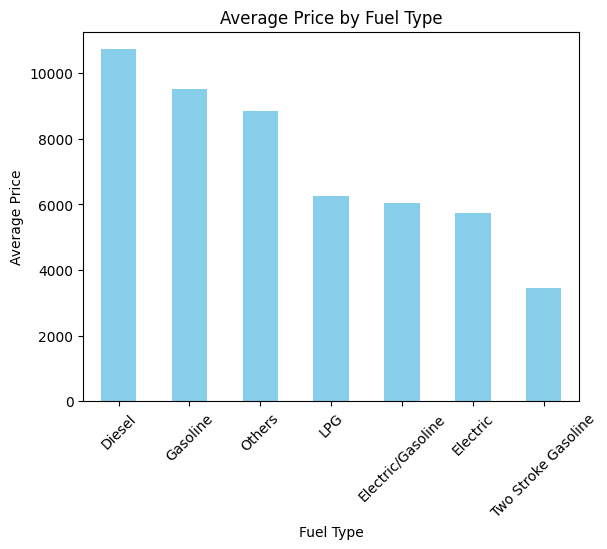

In [33]:
fuel_Avg_price.plot(kind="bar",color="skyblue")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Average Price by Fuel Type")
plt.xticks(rotation= 45)
plt.show()

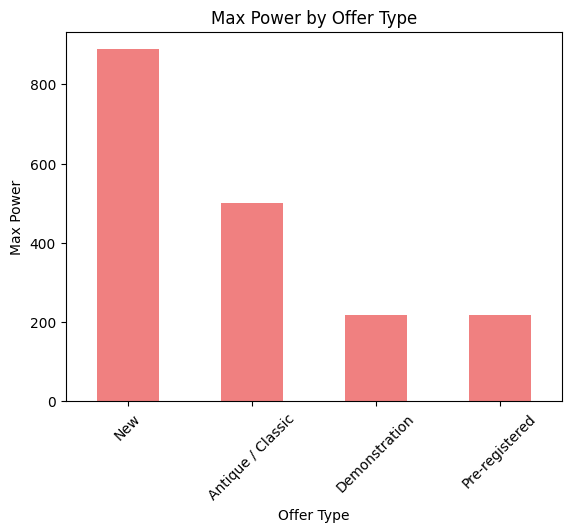

In [34]:
offer_max_power=offer_max_power.tail(4)
offer_max_power.plot(kind="bar",color='lightcoral')
plt.xlabel("Offer Type")
plt.ylabel("Max Power")
plt.title("Max Power by Offer Type")
plt.xticks(rotation=45)
plt.show()

In [35]:
fuel_distribution=df["fuel"].value_counts()
fuel_distribution


Gasoline               26761
Two Stroke Gasoline      468
Electric                 367
Others                   143
Diesel                   119
Electric/Gasoline          8
LPG                        1
Name: fuel, dtype: int64

In [36]:
fuel_distribution = fuel_distribution.tail(6)
fuel_distribution

Two Stroke Gasoline    468
Electric               367
Others                 143
Diesel                 119
Electric/Gasoline        8
LPG                      1
Name: fuel, dtype: int64

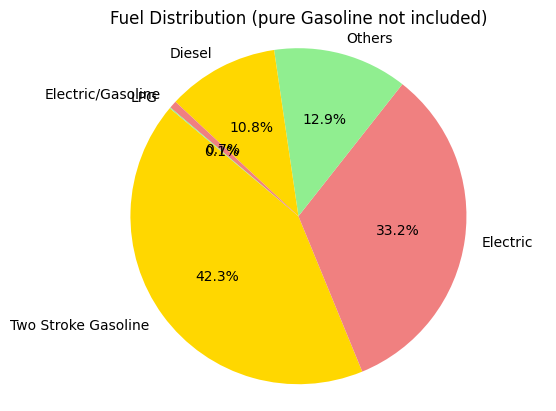

In [37]:
plt.pie(fuel_distribution, labels=fuel_distribution.index,autopct="%1.1f%%",startangle=140,colors=["gold","lightcoral","lightgreen"])
plt.axis("equal")
plt.title("Fuel Distribution (pure Gasoline not included)")
plt.show()

In [38]:
df.columns

Index(['price', 'mileage', 'power', 'make_model', 'date', 'fuel', 'gear',
       'offer_type', 'version', 'link'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Transforming all our object datatype into ints
df['version'] = label_encoder.fit_transform(df['version'])
df['make_model'] = label_encoder.fit_transform(df['make_model'])
df['date'] = label_encoder.fit_transform(df['date'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['gear'] = label_encoder.fit_transform(df['gear'])
df['offer_type'] = label_encoder.fit_transform(df['offer_type'])

df = df.drop('link', axis=1)
df.dtypes

C:\Users\DELL\AppData\Local\Temp\ipykernel_15536\11348636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['version'] = label_encoder.fit_transform(df['version'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15536\11348636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['make_model'] = label_encoder.fit_transform(df['make_model'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15536\11348636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

price           int64
mileage         int64
power         float64
make_model      int32
date            int32
fuel            int32
gear            int32
offer_type      int32
version         int32
dtype: object

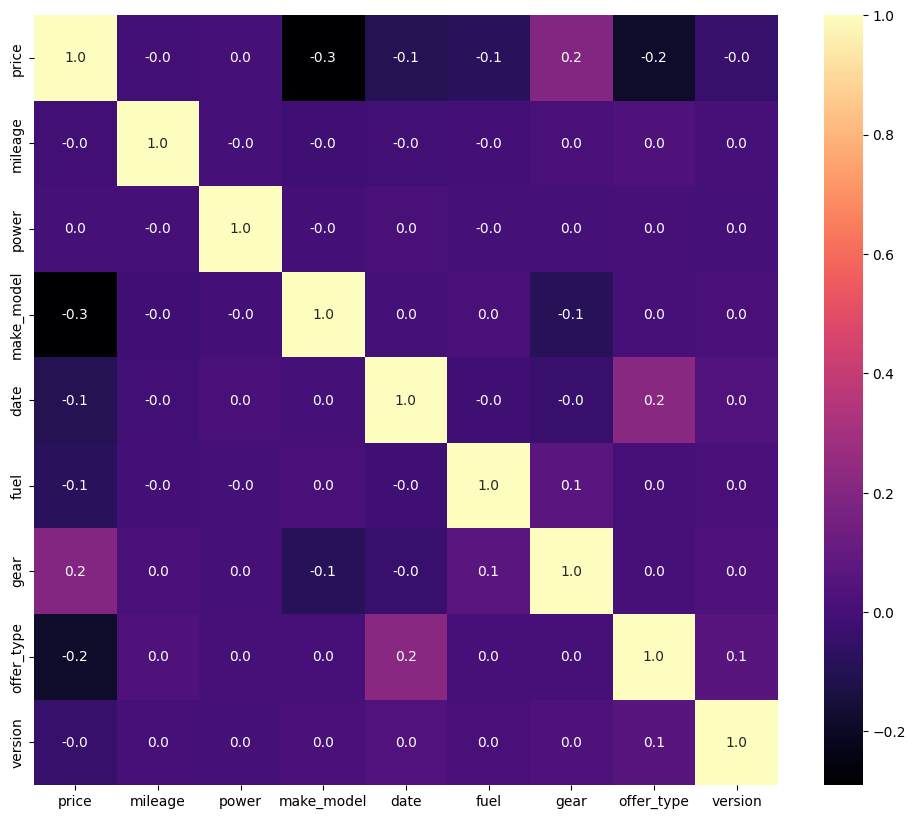

In [40]:
correlation = df.corr()
figure = plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.1f')
plt.show()

In [46]:
y=df[['price']].iloc[:, 0]

In [47]:
def column_to_1d(arr, warn=True):
    if arr.ndim == 2 and arr.shape[1] == 1:
        return arr.flatten()

    elif arr.ndim != 1:
        if warn:
            print("Warning: Input should be a column vector or 1D array.")

        raise ValueError("Input must be either a column vector or 1D array")

    else:
        return arr


In [48]:
y = column_to_1d(y)

In [49]:
X = df[['mileage','power','fuel','gear','offer_type']]
X

,mileage,power,fuel,gear,offer_type
17780,21226,118.00,3,1,4
15047,50500,90.00,3,1,4
8639,410,87.00,3,1,4
17945,0,0.00,3,1,2
21157,16570,92.00,3,1,4
...,...,...,...,...,...
34899,390,1.00,3,1,4
11155,19000,88.00,3,1,4
19299,6700,4.00,3,1,4
15003,23000,14.00,3,1,0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
scaled_X_train =scaler.fit_transform(X_train)
scaled_X_test =scaler.fit_transform(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [54]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [55]:
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [56]:
predslr=lr.predict(scaled_X_test)
predslr

array([9240.25630518, 9295.79014385, 9312.60301355, ..., 9338.6489943 ,
       9325.15752841, 9327.22593956])

In [57]:
modelresults(predslr)

Mean absolute error on model is 4063.132916456184
Mean squared error on model is 5137.890387876068


In [58]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel= SVR()

In [62]:
param_gridsvr={"C": [0.01,0.1,0.5],"kernel":["linear","rbf","poky"],"gamma":["scale","auto"],"degree":[2,3,4,5]}

In [63]:
gridsvr= GridSearchCV(svrmodel,param_gridsvr)

In [64]:
gridsvr.fit(scaled_X_train,y_train)

In [ ]:
print("Best parameters  for model is {}".format(gridsvr.best_params))

In [ ]:
predsgridsvr= gridsvr.predict(scaled_X_test)

In [ ]:
modelresults(predsgridsvr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel= RandomForestRegressor()

In [ ]:
param_gridrfr= {"bootstrap":[True],"max_depth":[5,10,15],"max_features":["auto","log2"],"n_estimators":[3,4,5,6,7]}

In [ ]:
gridrfr=GridSearchCV(rfrmodel,param_gridrfr)

In [ ]:
gridrfr.fit(scaled_X_train,y_train)

In [ ]:
print("Best parameters for model is {}".format(gridrfr.best_params_))

In [ ]:
predsgridrfr=gridrfr.predict(scaled_X_test)

In [ ]:
modelresults(predsgridrfr)